In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

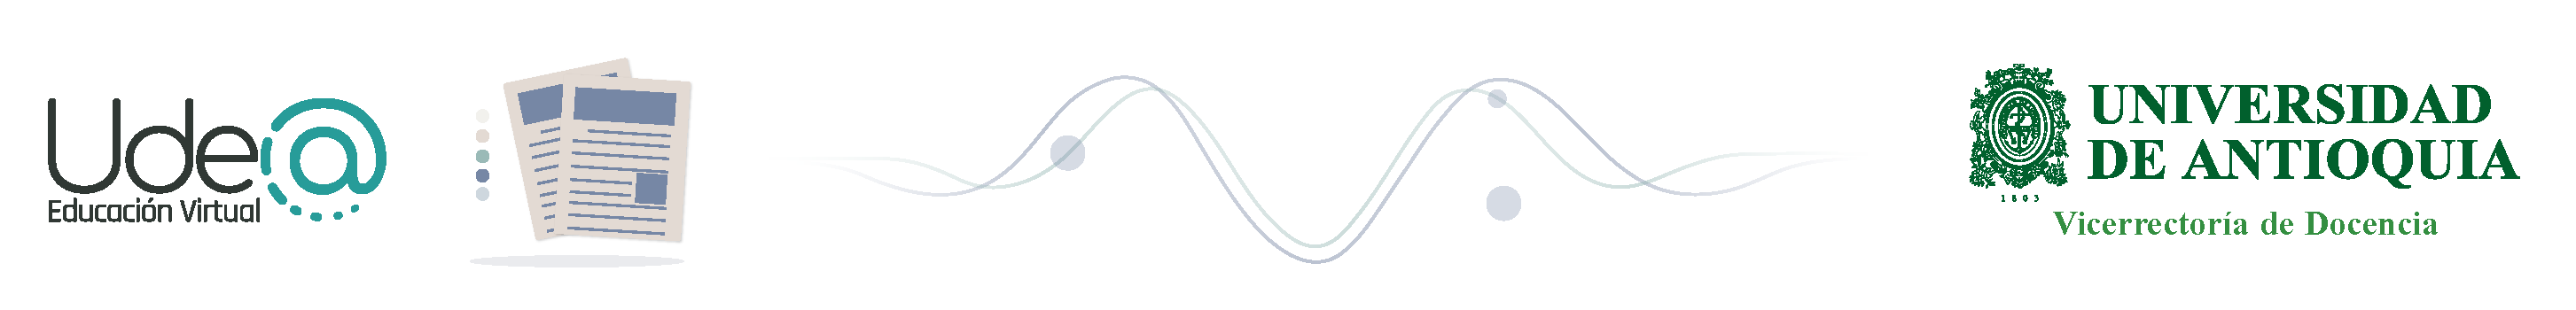

<div align="center">

#Mini-proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones

##Tratamiento de Señales III

Daniel Felipe Munoz Restrepo

Martin Alirio Barbosa Garzon 

###Facultad de Ingenierıa

###Universidad de Antioquia

###2023-1
</div>

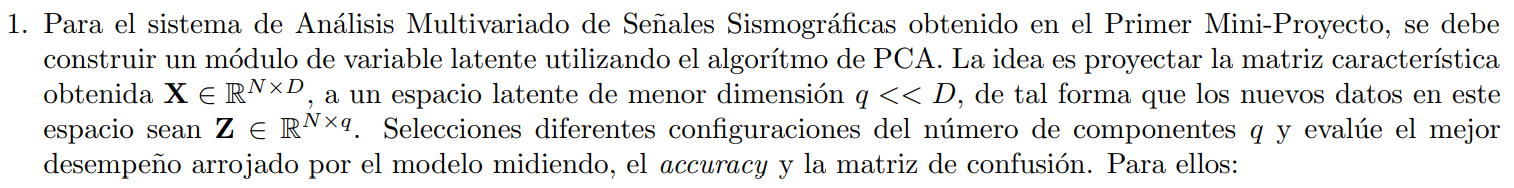

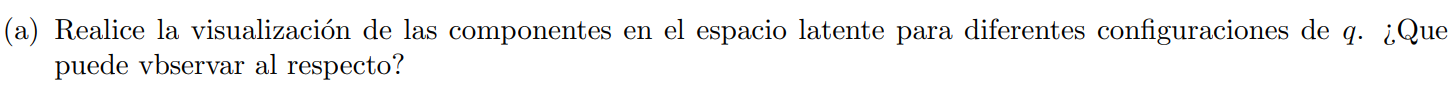

In [2]:
#Inicialmente realizamos el cargue del csv como un objeto dataframe, y lo previsualizamos

ruta_sisTele = 'https://drive.google.com/file/d/16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP/view?usp=share_link'
!gdown  "16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP" -O 'data.csv'

df = pd.read_csv('data.csv', sep = ",")
df.head()

Downloading...
From: https://drive.google.com/uc?id=16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP
To: /content/data.csv
100% 72.7k/72.7k [00:00<00:00, 98.6MB/s]


,Unnamed: 0,energy,max_power,max_power_freq,mean_spectrum,var_spectrum,max_spectrum,entropy,min_spectrum,no_zero_crossings,...,n5,n25,n75,n95,median,mean,std,var,rms,TipoSismo
0,0,5.310861e-02,1.419932e-02,0.390625,3.046022e-04,7.792240e-06,3.205470e-03,2.358735e-05,8.5897,150.0,...,-0.053306,-7.729353e-03,8.603073e-03,0.036545,3.591941e-04,1.179732e-03,0.054195,2.937069e-03,2.276029e-02,sisLoc
1,1,3.244844e-06,1.832449e-07,3.906250,5.284037e-06,4.242113e-10,5.961742e-05,4.607811e-07,8.5897,432.0,...,-0.000271,-9.981387e-05,9.876545e-05,0.000278,4.269650e-06,-1.405955e-06,0.000403,1.623306e-07,1.543846e-04,sisLoc
2,2,8.804790e-11,6.431583e-12,4.687500,3.225305e-08,1.080914e-14,3.264931e-07,2.796161e-09,8.5897,525.0,...,-0.000002,-5.790571e-07,5.971022e-07,0.000002,-3.080832e-09,-4.690671e-09,0.000002,4.465228e-12,8.961387e-07,sisLoc
3,3,8.978237e-02,2.309679e-02,0.195312,3.120260e-04,1.332553e-05,3.891565e-03,8.251276e-06,8.5897,111.0,...,-0.066823,-8.171886e-03,6.516919e-03,0.039791,-2.043158e-04,-4.059479e-04,0.071588,5.124898e-03,2.902386e-02,sisLoc
4,4,3.536772e-06,2.609267e-07,3.906250,3.617009e-06,5.492457e-10,5.447490e-05,7.573640e-08,8.5897,395.0,...,-0.000154,-5.767317e-05,5.347476e-05,0.000157,3.033610e-06,8.098535e-07,0.000414,1.710037e-07,1.002111e-04,sisLoc


In [3]:
# Selecciona los datos
X = df.loc[:, df.columns != 'Unnamed: 0'].iloc[:, :-1].values

# Selecciona las etiquetas
y = df.iloc[:, -1].values

# Codifica las etiquetas a valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Normaliza los datos
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

interactive(children=(Dropdown(description='n_components', options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

<function __main__.plot_pca(n_components)>

<Figure size 640x480 with 0 Axes>

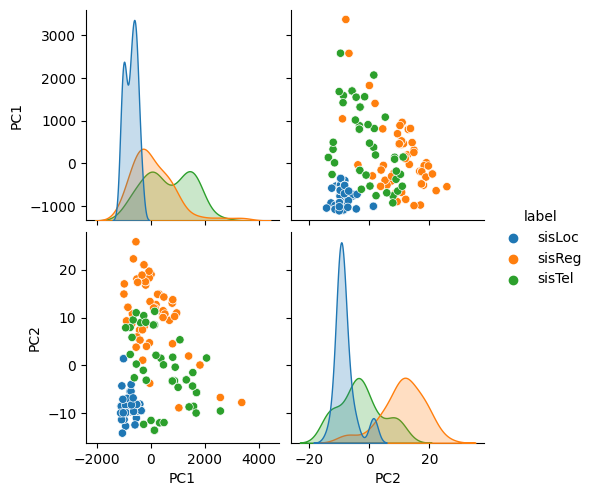

In [4]:
def plot_pca(n_components):
  
  # Crea el objeto PCA y establece el número de componentes a utilizar
  pca = PCA(n_components=n_components)

  # Aplica PCA a los datos normalizados
  X_pca = pca.fit_transform(X)

  # Transformar los datos al espacio latente
  X_latent = pca.transform(X)

  # Convertir los datos transformados a un DataFrame
  column_names = ['PC{}'.format(i+1) for i in range(n_components)]
  column_names.append('label')
  df_latent = pd.DataFrame(np.column_stack((X_pca, df.iloc[:, -1].values)), columns=column_names)


  # Agregar la etiqueta al DataFrame
  df_latent['label'] = df.iloc[:, -1].values
  
  # Limpia la figura actual
  plt.clf()  

  # Visualizar con pairplot
  sns.pairplot(df_latent, hue='label')

# Crear widget interactivo
widgets.interact(plot_pca, n_components = np.arange(2, 20, 1))

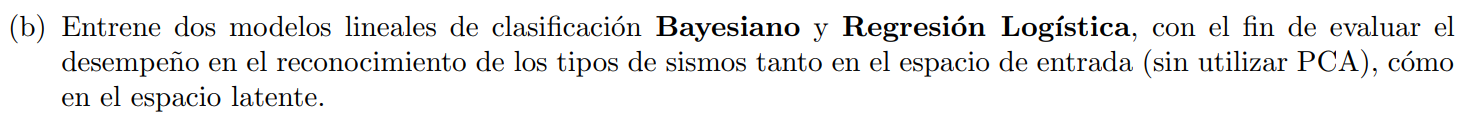

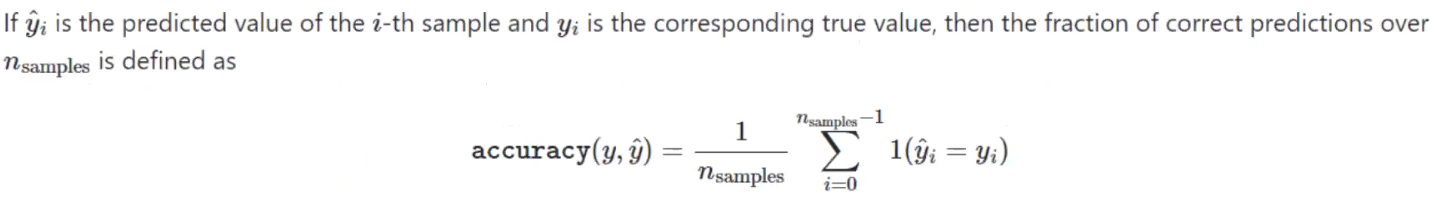



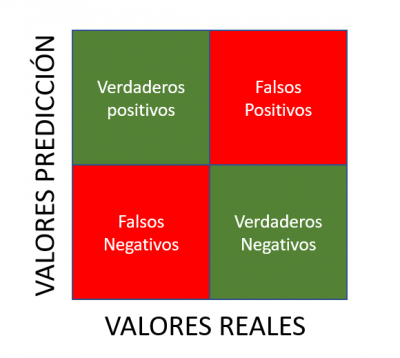

In [5]:
def train_test_split_and_fit(X_col, test_size):
  # Particionar los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X[:, :X_col], y, test_size=test_size, random_state=42)

  # Entrenar el clasificador Bayesiano
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train)

  # Entrenar el clasificador de regresión logística
  clfLR = LogisticRegression(random_state=0)
  clfLR.fit(X_train, y_train)

  # Realizar predicciones
  y_pred_testNB = clfNB.predict(X_test)
  y_pred_testLR = clfLR.predict(X_test)

  # Calcular la exactitud de los clasificadores
  accTest_NB = accuracy_score(y_test, y_pred_testNB)
  accTest_LR = accuracy_score(y_test, y_pred_testLR)

  print(f'El accuracy para el clasificador Bayesiano es: {accTest_NB} y para el clasificado de Regresion Logistica es: {accTest_LR}')

  # Mostrar la matriz de confusión para el clasificador Bayesiano
  cmNB = confusion_matrix(y_test, y_pred_testNB)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=df['TipoSismo'].unique() )
  disp.plot()
  plt.title('Matriz de confusión - Clasificador Bayesiano')
  plt.show()

  # Mostrar la matriz de confusión para el clasificador de regresión logística
  cmLR = confusion_matrix(y_test, y_pred_testLR)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=df['TipoSismo'].unique() )
  disp.plot()
  plt.title('Matriz de confusión - Clasificador Regresión Logística')
  plt.show()

# Crear los widgets
X_col_widget = widgets.IntSlider(value=4, min=1, max=X.shape[1], step=1, description='CantCaracteristicas:')
test_size_widget = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.1, description='test_size:')

# Crear la función interactiva
interactive_func = widgets.interactive(train_test_split_and_fit, X_col=X_col_widget, test_size=test_size_widget)

# Mostrar la interfaz gráfica
display(interactive_func)

interactive(children=(IntSlider(value=4, description='CantCaracteristicas:', max=19, min=1), FloatSlider(value…

In [6]:
def train_test_split_and_fit_latente(n_components, test_size):
  # Particionar los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Crea el objeto PCA y establece el número de componentes a utilizar
  pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

  # Transformar los datos al espacio latente
  X_train_latent = pca.transform(X_train)
  X_test_latent = pca.transform(X_test)

  # Entrenar el clasificador Bayesiano
  clfNB = GaussianNB()
  clfNB.fit(X_train_latent, y_train)

  # Entrenar el clasificador de regresión logística
  clfLR = LogisticRegression(random_state=0, max_iter=2000)
  clfLR.fit(X_train_latent, y_train)

  # Realizar predicciones
  y_pred_testNB = clfNB.predict(X_test_latent)
  y_pred_testLR = clfLR.predict(X_test_latent)

  # Calcular la exactitud de los clasificadores
  accTest_NB = accuracy_score(y_test, y_pred_testNB)
  accTest_LR = accuracy_score(y_test, y_pred_testLR)

  print(f'El accuracy para el clasificador Bayesiano es: {accTest_NB} y para el clasificador de Regresión Logística es: {accTest_LR}')

  # Mostrar la matriz de confusión para el clasificador Bayesiano
  cmNB = confusion_matrix(y_test, y_pred_testNB)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=df['TipoSismo'].unique() )
  disp.plot()
  plt.title('Matriz de confusión - Clasificador Bayesiano')
  plt.show()

  # Mostrar la matriz de confusión para el clasificador de regresión logística
  cmLR = confusion_matrix(y_test, y_pred_testLR)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=df['TipoSismo'].unique() )
  disp.plot()
  plt.title('Matriz de confusión - Clasificador Regresión Logística')
  plt.show()

# Crear los widgets
n_components_widget = widgets.IntSlider(value=4, min=1, max=X.shape[1], step=1, description='CantCaracteristicas:')
test_size_widget = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.1, description='test_size:')

# Crear la función interactiva
interactive_func = widgets.interactive(train_test_split_and_fit_latente, n_components=n_components_widget, test_size=test_size_widget)

# Mostrar la interfaz gráfica
display(interactive_func)

interactive(children=(IntSlider(value=4, description='CantCaracteristicas:', max=19, min=1), FloatSlider(value…

Se encontró que para nuestro caso en particular, al entrenar los modelos de clasificación Bayesiano y Regresión Logística con los datos originales, obtenemos mejores resultados de precisión que usando el espacio latente. Después de las pruebas realizadas, encontramos que al usar las primeras 8 características, llegamos al máximo rendimiento del modelo. El clasificador Bayesiano ofrece una precisión del 100% y el clasificador de Regresión Logística 89%. Además, un comportamiento interesante es que si seguimos aumentando la cantidad de características a usar, el modelo comienza a disminuir su rendimiento. Esto podría explicarse porque quizás las demás características empiezan a agregar más "ruido" en lugar de mejorar la separación de datos.

Al analizar la proyección en el espacio latente de las características, se encontró un desempeño inferior al de usar las características base, se encuentra el maximo rendimiento usando 4 componentes, obteniendo 82% y 86% en los clasificadores Bayesiano y Regresion Logistica respectivamente. Al momento de realizar el Pairplot del espacio latente con las 19 componentes, en casi todas las figuras, encontramos un patrón: los sismos locales se dispersan en la periferia de los datos, mientras que los sismos regionales y telesismos se agrupan y mezclan en el centro de las gráficas. Esto puede explicar la baja precisión de los modelos entrenados con el espacio latente en comparación con las características originales. Además, reforzamos esta teoría con el análisis del Pairplot del Mini Proyecto 1, donde se encontraron un par de características que permitían, a simple vista, una separación muy buena de los datos.

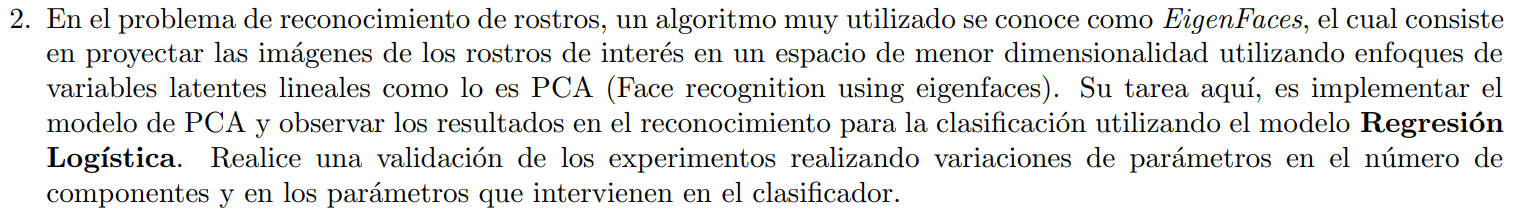

Accuracy: 0.77
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.44      0.48        18
     Colin Powell       0.73      0.81      0.77        69
  Donald Rumsfeld       0.65      0.65      0.65        34
    George W Bush       0.87      0.86      0.86       166
Gerhard Schroeder       0.70      0.74      0.72        31
      Hugo Chavez       0.73      0.58      0.65        19
       Tony Blair       0.73      0.72      0.73        50

         accuracy                           0.77       387
        macro avg       0.71      0.69      0.69       387
     weighted avg       0.77      0.77      0.77       387



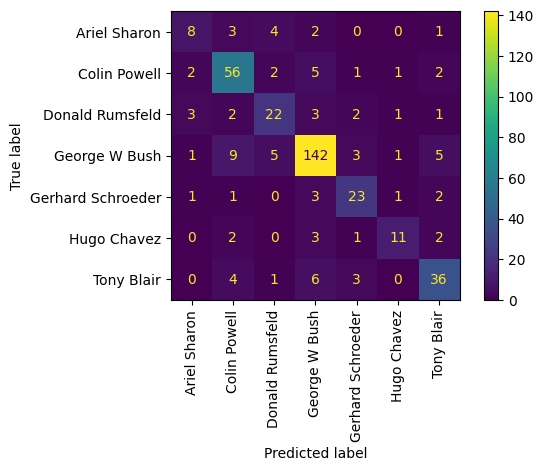

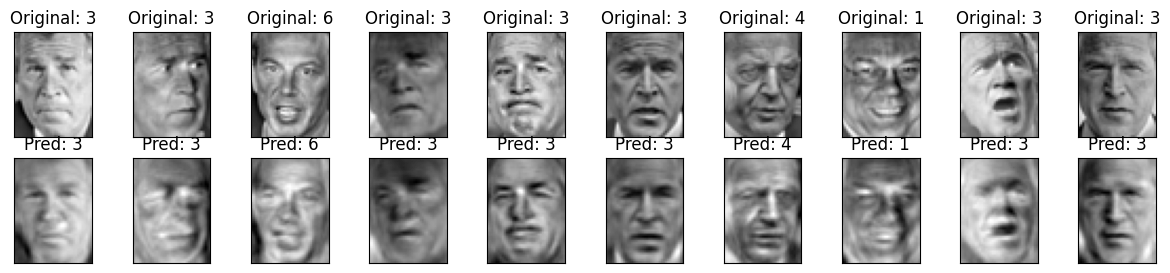

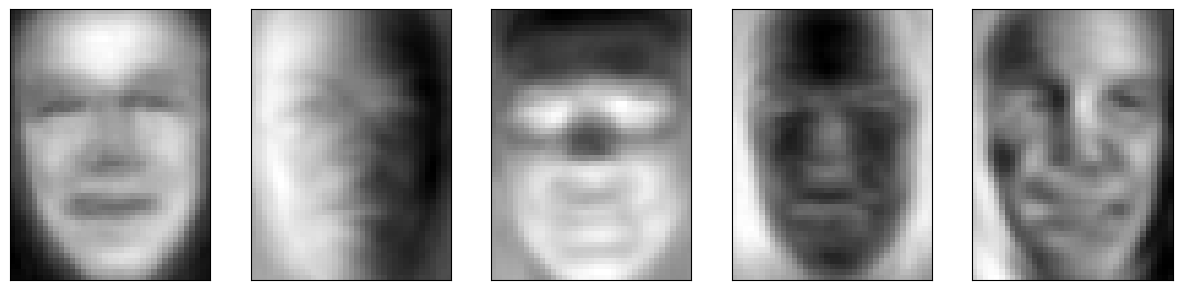

In [7]:
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report

#Cantidad de componentes
n_components = 100

# Cargar datos
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = faces.images.shape

X = faces.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = faces.target
target_names = faces.target_names

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crea el objeto PCA y establece el número de componentes a utilizar
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

# Transformar los datos al espacio latente
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el clasificador de regresión logística
clfLR = LogisticRegression(random_state=0, max_iter=2000)
clfLR.fit(X_train_pca, y_train)

# Calcular accuracy del modelo en el conjunto de prueba
y_pred = clfLR.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clfLR, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

# Visualizar imágenes reconstruidas
X_test_reconstructed = pca.inverse_transform(X_test_pca)
fig, axes = plt.subplots(2, 10, figsize=(15, 3), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    if i < 10:
        ax.imshow(X_test[i].reshape(h, w), cmap='gray')
        ax.set_title(f"Original: {y_test[i]}")
    else:
        ax.imshow(X_test_reconstructed[i-10].reshape(h, w), cmap='gray')
        ax.set_title(f"Pred: {clfLR.predict(X_test_pca[i-10].reshape(1,-1))[0]}")

# Visualizar EigenFaces
eigenfaces = pca.components_.reshape((n_components, h, w))
fig, axes = plt.subplots(1, 5, figsize=(15, 6), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')

plt.show()

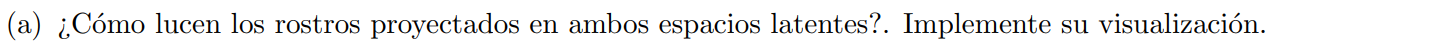

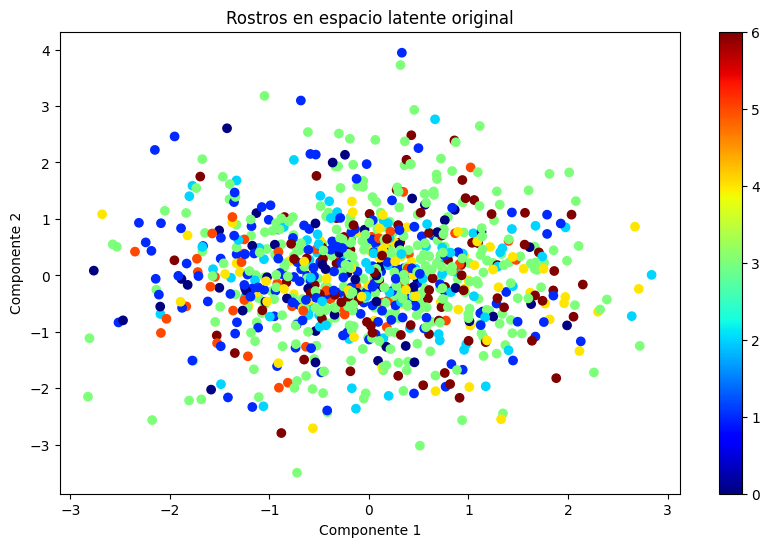

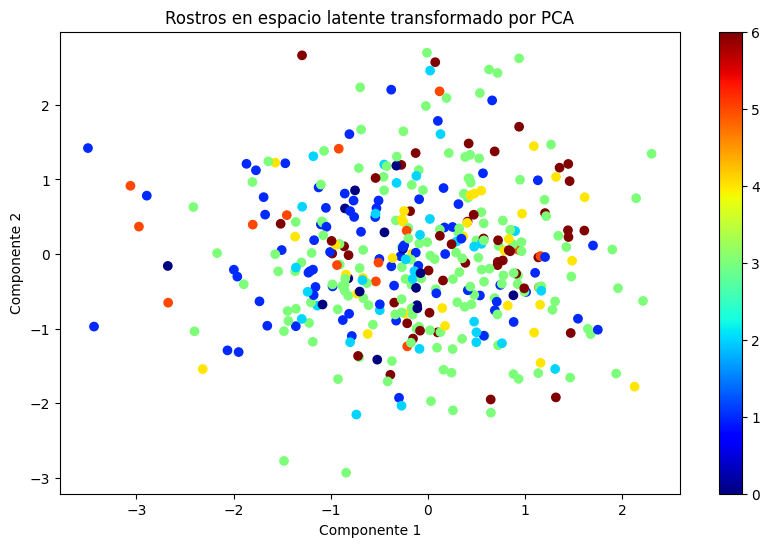

In [8]:
import matplotlib.pyplot as plt

# Visualizar rostros en espacio latente original
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='jet')
plt.colorbar()
plt.title('Rostros en espacio latente original')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

# Visualizar rostros en espacio latente transformado por PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='jet')
plt.colorbar()
plt.title('Rostros en espacio latente transformado por PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


La primera visualización muestra los rostros en el espacio latente original, donde cada punto representa un rostro y los colores indican la identidad de la persona. La segunda visualización muestra los rostros en el espacio latente transformado por PCA, donde cada punto representa un rostro y los colores indican la predicción del modelo de regresión logística.

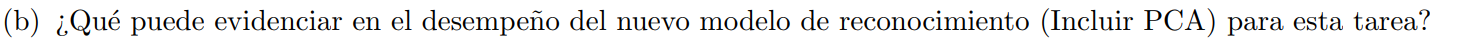

In [10]:
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Cargar datos
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = faces.images.shape

X = faces.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = faces.target
target_names = faces.target_names

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear una tabla para almacenar el accuracy del modelo para diferentes números de componentes
accuracy_table = pd.DataFrame(columns=['n_components', 'accuracy'])

# Probar diferentes números de componentes
for n_components in np.arange(10, 885, 25):
    
    # Crea el objeto PCA y establece el número de componentes a utilizar
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

    # Transformar los datos al espacio latente
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Entrenar el clasificador de regresión logística
    clfLR = LogisticRegression(random_state=0, max_iter=2000)
    clfLR.fit(X_train_pca, y_train)

    # Calcular accuracy del modelo en el conjunto de prueba
    y_pred = clfLR.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Agregar el accuracy a la tabla
    accuracy_table = pd.concat([accuracy_table, pd.DataFrame({'n_components': [n_components], 'accuracy': [accuracy]})], ignore_index=True)

    #print(f"Accuracy with {n_components} components: {accuracy:.2f}")

print(accuracy_table)


   n_components  accuracy
0            10  0.493540
1            35  0.767442
2            60  0.813953
3            85  0.777778
4           110  0.770026
5           135  0.806202
6           160  0.803618
7           185  0.793282
8           210  0.801034
9           235  0.782946
10          260  0.785530
11          285  0.790698
12          310  0.793282
13          335  0.793282
14          360  0.764858
15          385  0.775194
16          410  0.764858
17          435  0.757106
18          460  0.759690
19          485  0.767442
20          510  0.754522
21          535  0.746770
22          560  0.759690
23          585  0.739018
24          610  0.741602
25          635  0.728682
26          660  0.718346
27          685  0.702842
28          710  0.702842
29          735  0.689922
30          760  0.710594
31          785  0.687339
32          810  0.684755
33          835  0.684755
34          860  0.679587
